In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = " "
os.environ['KAGGLE_KEY'] = " "


In [ ]:
!kaggle datasets download tawsifurrahman/covid19-radiography-database

 99% 773M/778M [00:06<00:00, 170MB/s]
100% 778M/778M [00:06<00:00, 130MB/s]


In [ ]:
!unzip covid19-radiography-database.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
 

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import shutil

# libraries for CNN models and plotting
import tensorflow as tf
import tensorflow.keras.layers as tfl

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install openpyxl

In [ ]:
import pandas as pd
covid = pd.read_excel('/content/COVID-19_Radiography_Dataset/COVID.metadata.xlsx')
covid.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [ ]:
normal = pd.read_excel('COVID-19_Radiography_Dataset/Normal.metadata.xlsx')
normal.head()

,FILE NAME,FORMAT,SIZE,URL
0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
2,NORMAL-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
3,NORMAL-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
4,NORMAL-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [ ]:
viral_pneumonia = pd.read_excel('COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx')
viral_pneumonia.head()

,FILE NAME,FORMAT,SIZE,URL
0,Viral Pneumonia-1,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
1,Viral Pneumonia-2,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
2,Viral Pneumonia-3,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
3,Viral Pneumonia-4,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
4,Viral Pneumonia-5,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...


In [ ]:
print("Covid cases: ", str(len(covid)))
print("Normal cases: ", str(len(normal)))
print("Viral Pneumonia cases: ", str(len(viral_pneumonia)))

Covid cases:  3616
Normal cases:  10192
Viral Pneumonia cases:  1345


In [ ]:
SAMPLE_SIZE = 1345

In [ ]:
covid['label'] = 0
normal['label'] = 1
viral_pneumonia['label'] = 2

In [ ]:
covid = covid[['FILE NAME', 'label']]
normal = normal[['FILE NAME', 'label']]
viral_pneumonia = viral_pneumonia[['FILE NAME', 'label']]
covid.head()

,FILE NAME,label
0,COVID-1,0
1,COVID-2,0
2,COVID-3,0
3,COVID-4,0
4,COVID-5,0


In [ ]:
df_0 = covid.sample(SAMPLE_SIZE, random_state=26)
df_1 = normal.sample(SAMPLE_SIZE, random_state=26)


data = pd.concat([df_0, df_1, viral_pneumonia], axis=0).reset_index(drop=True)


data['label'].value_counts()

0    1345
1    1345
2    1345
Name: label, dtype: int64

In [ ]:
data = shuffle(data)
data.head()

,FILE NAME,label
2848,Viral Pneumonia-159,2
3695,Viral Pneumonia-1006,2
2887,Viral Pneumonia-198,2
3477,Viral Pneumonia-788,2
153,COVID-420,0


In [ ]:
df_train, df_val = train_test_split(data, test_size=0.20, random_state=26, stratify=data['label'])

print(df_train.shape)
print(df_val.shape)

(3228, 2)
(807, 2)


In [ ]:
df_train['label'].value_counts()

1    1076
2    1076
0    1076
Name: label, dtype: int64

In [ ]:
df_val['label'].value_counts()

1    269
2    269
0    269
Name: label, dtype: int64

In [ ]:
base_dir = 'base_dir'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)


val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)

train_covid = os.path.join(train_dir, 'covid')
os.mkdir(train_covid)
train_normal = os.path.join(train_dir, 'normal')
os.mkdir(train_normal)
train_viral_pneumonia = os.path.join(train_dir, 'viral pneumonia')
os.mkdir(train_viral_pneumonia)

val_covid = os.path.join(val_dir, 'covid')
os.mkdir(val_covid)
val_normal = os.path.join(val_dir, 'normal')
os.mkdir(val_normal)
val_viral_pneumonia = os.path.join(val_dir, 'viral pneumonia')
os.mkdir(val_viral_pneumonia)

In [ ]:
os.listdir('base_dir/train_dir')

['viral pneumonia', 'normal', 'covid']

In [ ]:
train_list = list(df_train['FILE NAME'])
val_list = list(df_val['FILE NAME'])

In [ ]:
for image in train_list:
    filename = image + '.png'
    target = int(data.loc[data['FILE NAME'] == image, ['label']].values)

    if target == 0:
        label = 'covid'
        src = os.path.join('COVID-19_Radiography_Dataset/COVID/images', filename)

    if target == 1:
        label = 'normal'

        filename = filename.capitalize()
        src = os.path.join('COVID-19_Radiography_Dataset/Normal/images', filename)

    if target == 2:
        label = 'viral pneumonia'
        src = os.path.join('COVID-19_Radiography_Dataset/Viral Pneumonia/images', filename)


    dst = os.path.join(train_dir, label, filename)


    shutil.copyfile(src, dst)

for image in val_list:

    filename = image + '.png'

    target = int(data.loc[data['FILE NAME'] == image, ['label']].values)


    if target == 0:
        label = 'covid'
        src = os.path.join('COVID-19_Radiography_Dataset/COVID/images', filename)

    if target == 1:
        label = 'normal'
        filename = filename.capitalize()
        src = os.path.join('COVID-19_Radiography_Dataset/Normal/images', filename)

    if target == 2:
        label = 'viral pneumonia'
        src = os.path.join('COVID-19_Radiography_Dataset/Viral Pneumonia/images', filename)


    dst = os.path.join(val_dir, label, filename)

    shutil.copyfile(src, dst)

In [ ]:
print(len(os.listdir('base_dir/train_dir/covid')))
print(len(os.listdir('base_dir/train_dir/normal')))
print(len(os.listdir('base_dir/train_dir/viral pneumonia')))

1076
1076
1076


In [ ]:
print(len(os.listdir('base_dir/val_dir/covid')))
print(len(os.listdir('base_dir/val_dir/normal')))
print(len(os.listdir('base_dir/val_dir/viral pneumonia')))

269
269
269


In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (224  , 224)
train_directory = "base_dir/train_dir"
val_directory = "base_dir/val_dir"

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
        rotation_range=0.2,
        shear_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_directory,
        target_size=IMG_SIZE,
        color_mode='grayscale',
        batch_size=32,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        val_directory,
        target_size=IMG_SIZE,
        color_mode='grayscale',
        batch_size=32,
        shuffle=False,
        class_mode='categorical')

Found 3228 images belonging to 3 classes.
Found 807 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'covid': 0, 'normal': 1, 'viral pneumonia': 2}

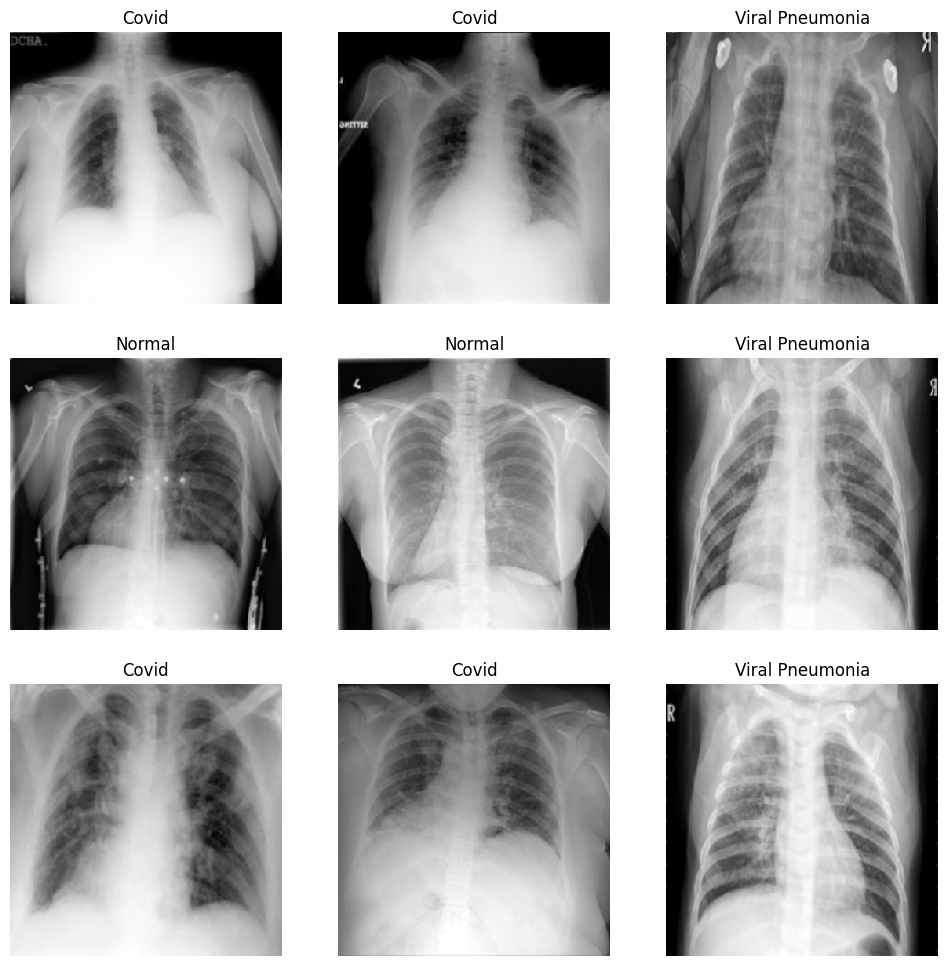

In [ ]:
import numpy as np
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3,3, i+1)
    img, label = train_generator.next()
    plt.imshow(img[0], cmap='gray')
    dic = {0:'Covid', 1:'Normal', 2:'Viral Pneumonia'}
    plt.title(dic.get(np.where(label[0]==1)[0][0]))
    plt.axis('off')
plt.show()


In [ ]:
def covid_model1(IMG_SIZE):
    input_shape = IMG_SIZE + (1, )
    model = Sequential([
        Conv2D(32, (3, 3), activation="relu", padding='same',input_shape=input_shape),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(32, (3, 3), padding='same', activation="relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(64, (3, 3), padding='same',activation="relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(64, (3, 3), padding='same',activation="relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(128, (3, 3), padding='same',activation="relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(128, (3, 3), padding='same',activation="relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(128, (3, 3), padding='same',activation="relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(256, (3, 3), padding='same',activation="relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Flatten(),

        Dense(units=128, activation='relu'),
        Dense(units=64, activation='relu'),
        Dense(units=3, activation='softmax')
    ])
    return model

In [ ]:
IMG_SIZE

NameError: ignored

In [ ]:
model1 = covid_model1(IMG_SIZE)

ValueError: ignored

In [ ]:
model1.summary()

NameError: ignored

In [ ]:
base_learning_rate = 0.001
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
initial_epochs = 15
history = model1.fit(train_generator, epochs=initial_epochs,
                     validation_data = validation_generator, callbacks=[early_stopping])

  8/101 [=>............................] - ETA: 8:53 - loss: 0.1003 - accuracy: 0.9609

KeyboardInterrupt: ignored

In [ ]:
model1.evaluate(validation_generator)

26/26 [==============================] - 23s 892ms/step - loss: 0.2789 - accuracy: 0.9170


[0.2789320945739746, 0.9169764518737793]

In [ ]:
def plot_loss_acc(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(train_loss))

    plt.figure(figsize=(8,6))
    plt.plot(epochs, train_loss, color='b', label='Train')
    plt.plot(epochs, val_loss, color='r', label='Validation')
    plt.legend()
    plt.title('Model Loss')


    plt.figure(figsize=(8,6))
    plt.plot(epochs, acc, color='b', label='Train')
    plt.plot(epochs, val_acc, color='r', label='Validation')
    plt.legend()
    plt.title('Model Accuracy')

    plt.show()

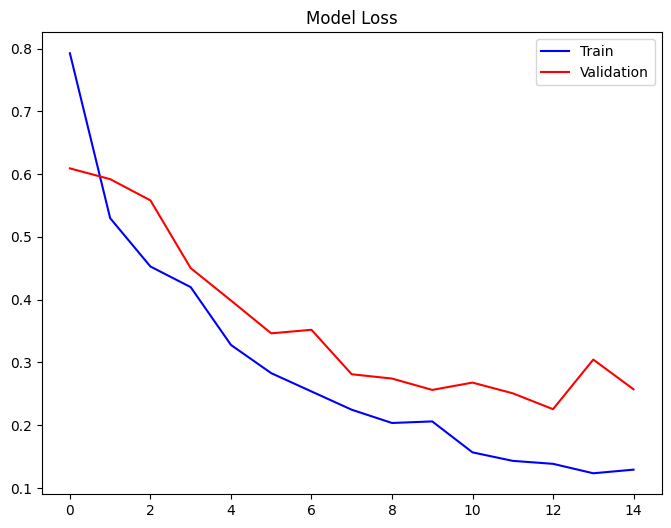

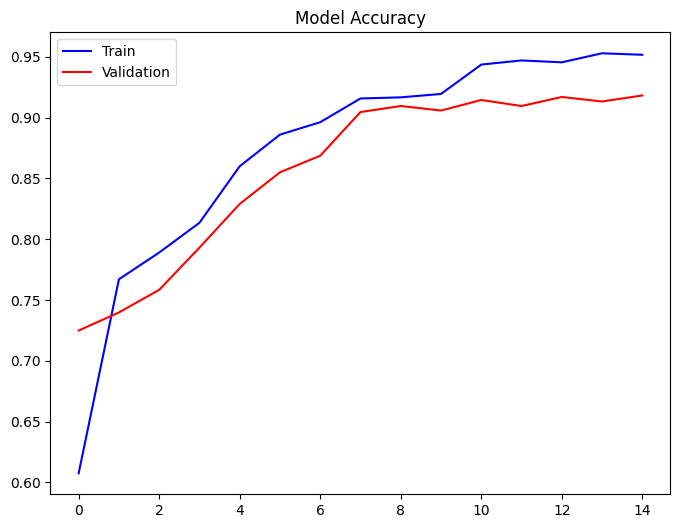

In [ ]:
plot_loss_acc(history)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:

val_predict = model1.predict(validation_generator)

26/26 [==============================] - 35s 1s/step


In [ ]:
predict_class = np.argmax(val_predict, axis=1)
predict_class = predict_class.tolist()

In [ ]:
labels = ['Covid', 'Normal', 'Viral Pneumonia']
report = classification_report(validation_generator.classes, predict_class, target_names=labels)
print(report)

                 precision    recall  f1-score   support

          Covid       0.86      0.93      0.90       269
         Normal       0.95      0.86      0.90       269
Viral Pneumonia       0.95      0.96      0.95       269

       accuracy                           0.92       807
      macro avg       0.92      0.92      0.92       807
   weighted avg       0.92      0.92      0.92       807



In [ ]:
cm = confusion_matrix(validation_generator.classes, predict_class)
cm_df = pd.DataFrame(cm,
                     index = ['COVID','NORMAL','VIRAL PNEUMONIA'],
                     columns = ['COVID','NORMAL','VIRAL PNEUMONIA'])

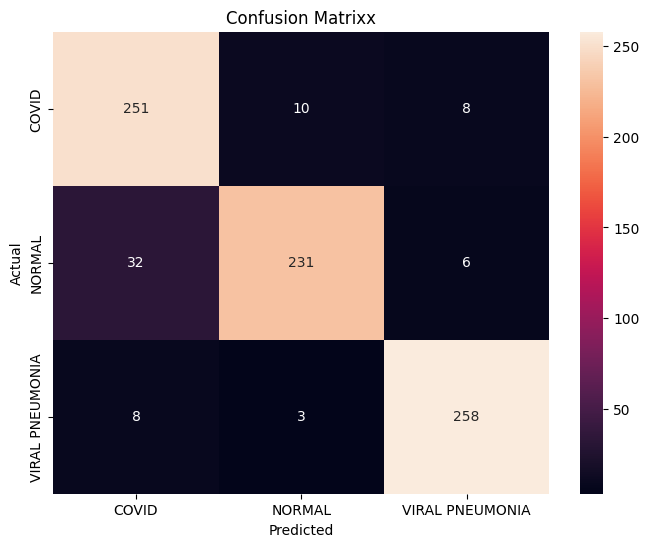

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d')
plt.title("Confusion Matrixx")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()